In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import functools
%matplotlib inline

In [2]:
forest_5_5 = nx.read_edgelist("./SAN-royal+forest-5-5-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
forest_5_10 = nx.read_edgelist("./SAN-royal+forest-5-10-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
forest_10_5 = nx.read_edgelist("./SAN-royal+forest-10-5-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])


In [3]:
forest_5_5_na = pd.read_csv("./SAN-royal+forest-5-5-NA.csv", delimiter="\t")
# forest_5_5_na.followers = forest_5_5_na.followers.astype(int)

forest_5_10_na = pd.read_csv("./SAN-royal+forest-5-10-NA.csv", delimiter="\t")
# forest_5_10_na.followers = forest_5_10_na.followers.astype(int)

forest_10_5_na = pd.read_csv("./SAN-royal+forest-10-5-NA.csv", delimiter="\t")
# forest_10_5_na.followers = forest_10_5_na.followers.astype(int)

In [4]:
# Assign node atrributes to nodes in the graph
def addAttributes(graph, na):
    labels = na.columns
    iter = 0

    for ID in na[labels[0]]:

        for feature in labels:
            cat = na[feature][iter]

            if type(cat) is str:
                graph.node[ID][feature] = cat

            if not type(cat) is float or not math.isnan(cat):
                graph.node[ID][feature] = cat

        iter += 1

In [5]:
# Remove nodes created from edges leading out of the graph (next level of depth)
def removeFakeNode(graph, na):
    gNodes  = graph.nodes()
    naNodes = list(na[na.columns[0]])
    
    fakeNodes = list(set(gNodes) - set(naNodes))
    graph.remove_nodes_from(fakeNodes)
    print(len(fakeNodes))

In [6]:
addAttributes(forest_5_5, forest_5_5_na)
addAttributes(forest_5_10, forest_5_10_na)
addAttributes(forest_10_5, forest_10_5_na)
removeFakeNode(forest_5_5, forest_5_5_na)
removeFakeNode(forest_5_10, forest_5_10_na)
removeFakeNode(forest_10_5, forest_10_5_na)

0
0
0


In [7]:
print(forest_5_5.number_of_nodes(), forest_5_5.number_of_edges())
print(forest_5_10.number_of_nodes(), forest_5_10.number_of_edges())
print(forest_10_5.number_of_nodes(), forest_10_5.number_of_edges())

42 115
1972 5330
1279 2630


## In Degree Analysis

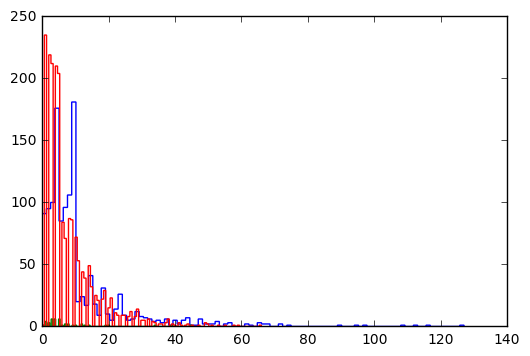

In [8]:
in_degrees_forest_5_5 = forest_5_5.in_degree(weight="rank")
in_degrees_forest_5_10 = forest_5_10.in_degree(weight="rank")
in_degrees_forest_10_5 = forest_10_5.in_degree(weight="rank")

    
_ = plt.hist(list(in_degrees_forest_10_5.values()), bins=100, histtype='step')
_ = plt.hist(list(in_degrees_forest_5_5.values()), bins=100, histtype='step')
_ = plt.hist(list(in_degrees_forest_5_10.values()), bins=100, histtype='step')

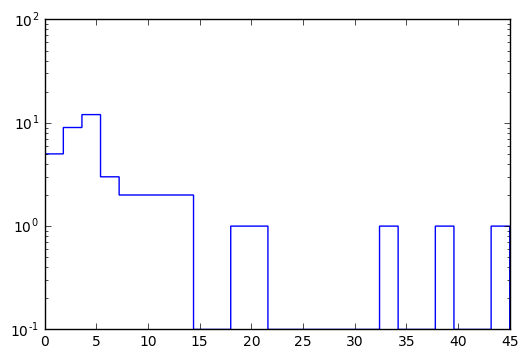

In [9]:
_ = plt.hist(list(in_degrees_forest_5_5.values()), bins=25, histtype='step', log=True)

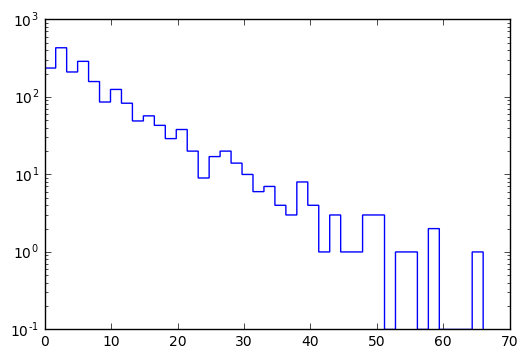

In [10]:
_ = plt.hist(list(in_degrees_forest_5_10.values()), bins=40, histtype='step', log=True)

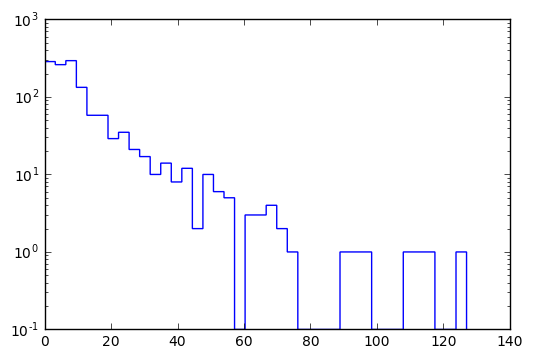

In [12]:
_ = plt.hist(list(in_degrees_forest_10_5.values()), bins=40, histtype='step', log=True)

Observation: In-degree seems to decay exponentially.

^check with log graph

drop off at 5 or 10 because leaf nodes only have 1 in-edge always with weight 1->5 or 10

In [13]:
# pop = []
# fol = []
# num = 0
# for k,v in in_degrees_forest_5_5.items():
#     if v > 40:
# #         print(forest_5_5.node[k])
# #         print("\n")
#         pop.append(forest_5_5.node[k]["popularity"])
#         fol.append(forest_5_5.node[k]["followers"])
#         num += 1
# for k,v in in_degrees_forest_5_10.items():
#     if v > 50:
# #         print(forest_5_10.node[k])
# #         print("\n")
#         pop.append(forest_5_10.node[k]["popularity"])
#         fol.append(forest_5_10.node[k]["followers"])
#         num += 1
# for k,v in in_degrees_forest_10_5.items():
#     if v > 150:
# #         print(forest_10_5.node[k])
# #         print("\n")
#         pop.append(forest_10_5.node[k]["popularity"])
#         fol.append(forest_10_5.node[k]["followers"])
#         num += 1
        
# print(sum(pop)/len(pop))
# print(sum(fol)/len(fol))


In [14]:
def topInDegreeAvgs(graph, pct):
    in_degrees = graph.in_degree(weight="rank")
    topPop = []
    topFol = []
    avgPop = []
    avgFol = []
    num = 0
    
    for k in in_degrees.keys():
            avgPop.append(graph.node[k]['popularity'])
            avgFol.append(graph.node[k]['followers'])
            
    avgPop.sort()
    avgFol.sort()
    topPop = avgPop[int(len(avgPop) * pct) : int(len(avgPop))]
    topFol = avgFol[int(len(avgFol) * pct) : int(len(avgFol))]
    return [sum(avgPop)/len(avgPop), sum(avgFol)/len(avgFol), sum(topPop)/len(topPop), sum(topFol)/len(topFol)]

def topInDegreeLists(graph, pct):
    in_degrees = graph.in_degree(weight="rank")
    topPop = []
    topFol = []
    avgPop = []
    avgFol = []
    num = 0
    
    for k in in_degrees.keys():
            avgPop.append(graph.node[k]['popularity'])
            avgFol.append(graph.node[k]['followers'])
            
    avgPop.sort()
    avgFol.sort()
    topPop = avgPop[int(len(avgPop) * pct) : int(len(avgPop))]
    topFol = avgFol[int(len(avgFol) * pct) : int(len(avgFol))]
    return [avgPop, avgFol, topPop, topFol]

print(topInDegreeAvgs(forest_5_5, .90))
print(topInDegreeAvgs(forest_5_10, .90))
print(topInDegreeAvgs(forest_10_5, .90))

[23.071428571428573, 10087.880952380952, 49.200000000000003, 51609.199999999997]


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [15]:
b55idl = topInDegreeLists(forest_5_5, .90)

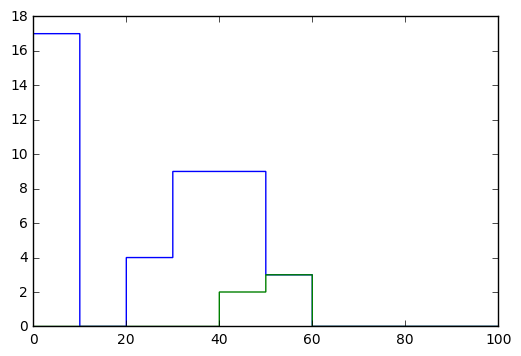

In [16]:
_ = plt.hist(b55idl[0], range=(0,100), histtype="step")
_ = plt.hist(b55idl[2], range=(0,100), histtype="step")

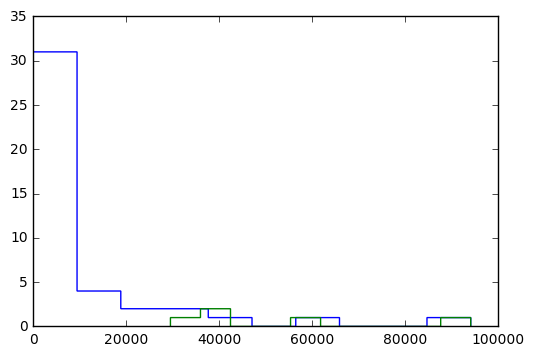

In [17]:
_ = plt.hist(b55idl[1], histtype="step")
_ = plt.hist(b55idl[3], histtype="step")

Observation: the artist with the highest in degree value are significantly more popular than the average artist in the graph

## Genre Analysis

In [18]:
def genreSimilarity(gA, gB):
#     jaccard index
    total = len(list(set(gA) | set(gB)))
    same  = len(list(set(gA) & set(gB)))
    if total == 0:
        return 0
    return same/total

def getGenres(node):
    genres = []
    for g in ["genre1", "genre2", "genre3", "genre4", "genre5"]:
        if g in node:
            genres.append(node[g])
    return genres

In [19]:
def similarity(g):
    sim = []
    for s,t,d in g.edges(data=True):
        gS = getGenres(g.node[s])
        gT = getGenres(g.node[t])
        sim.append(genreSimilarity(gS, gT))
    return sim

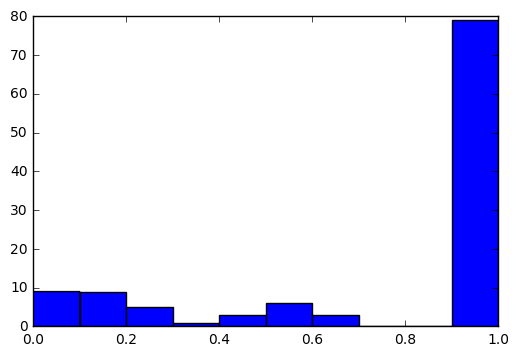

In [20]:
_ = plt.hist(similarity(forest_5_5))

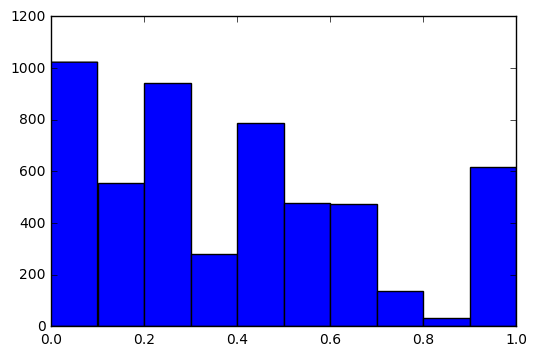

In [21]:
_ = plt.hist(similarity(forest_5_10))

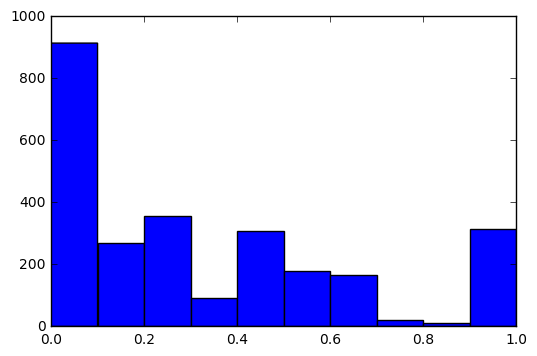

In [22]:
_ = plt.hist(similarity(forest_10_5))

In [23]:
def genreList(graph):
    genres = []
    labels = ["genre1", "genre2", "genre3", "genre4", "genre5"]
    
    for n,d in graph.nodes_iter(data=True):
        for l in labels:
            if l in d:
                genres.append(d[l])
    return genres

def genreShuffle(graph):
    genres = genreList(graph)
    random.shuffle(genres)
    return genres

In [24]:
def genreReassign(graph, genres):
    genresLen = len(genres)
    iter = 0

    for ID in graph.nodes():
        for g in ["genre1", "genre2", "genre3", "genre4", "genre5"]:
            if g in graph.node[ID] and iter < genresLen:
                graph.node[ID][g] = genres[iter]
            iter += 1

In [26]:
forest_5_5_shuf = forest_5_5.copy()
genreReassign(forest_5_5_shuf, genreShuffle(forest_5_5_shuf))

forest_5_10_shuf = forest_5_10.copy()
genreReassign(forest_5_10_shuf, genreShuffle(forest_5_10_shuf))

forest_10_5_shuf = forest_10_5.copy()
genreReassign(forest_10_5_shuf, genreShuffle(forest_10_5_shuf))


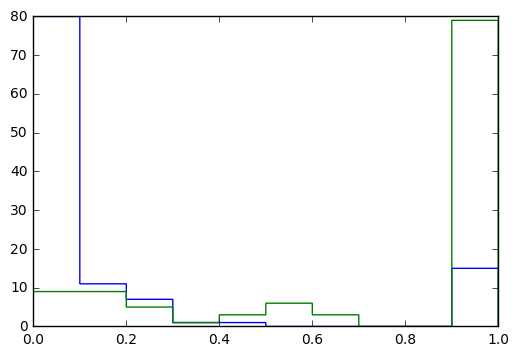

In [27]:
_ = plt.hist(similarity(forest_5_5_shuf), histtype="step")
_ = plt.hist(similarity(forest_5_5), histtype="step")

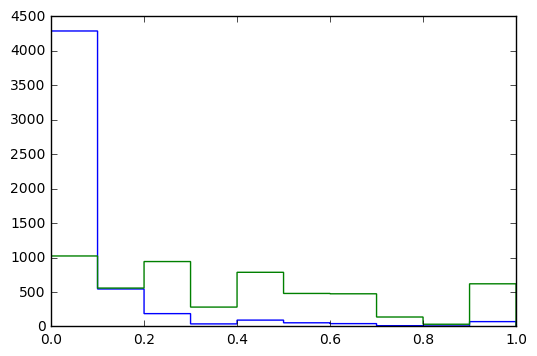

In [28]:
_ = plt.hist(similarity(forest_5_10_shuf), histtype="step")
_ = plt.hist(similarity(forest_5_10), histtype="step")

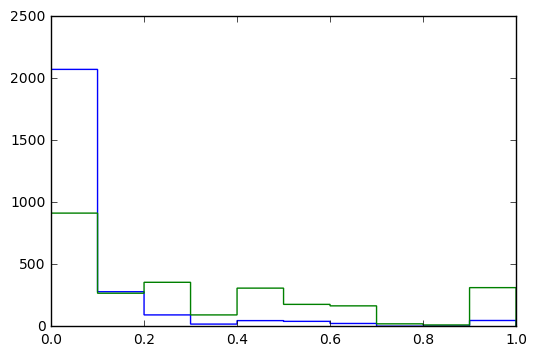

In [29]:
_ = plt.hist(similarity(forest_10_5_shuf), histtype="step")
_ = plt.hist(similarity(forest_10_5), histtype="step")

Observation: While genre doesn't seem to have a strong correclation with edges, it definitely has some significant influence.

## Clustering Analysis

In [30]:
def clustering(graph, node):
    existing = 0
    for x in graph.neighbors(node):
        existing += 1
    return existing

forest_5_5.nodes()[10:14]

['2Tcg8ur8LDClHZG1I11iN8',
 '0bsV0sUjnCuCTYOnNHQl3E',
 '2c9yn5DJQd5es7YMY92ikZ',
 '7b9oNYQgcmcDCFtFc3fNfp']

In [31]:
clustering(forest_5_5, "2Tcg8ur8LDClHZG1I11iN8")

0